Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.



Epoch 1/20


2525/2525 [==============================] - 4362s 2s/step - loss: 4.3667 - accuracy: 0.0413 - val_loss: 4.0878 - val_accuracy: 0.0847
Epoch 2/20
2525/2525 [==============================] - 4227s 2s/step - loss: 3.9738 - accuracy: 0.0956 - val_loss: 3.6534 - val_accuracy: 0.1497
Epoch 3/20
2525/2525 [==============================] - 4258s 2s/step - loss: 3.7046 - accuracy: 0.1368 - val_loss: 3.4771 - val_accuracy: 0.1753
Epoch 4/20
2525/2525 [==============================] - 4334s 2s/step - loss: 3.5440 - accuracy: 0.1666 - val_loss: 3.2826 - val_accuracy: 0.2149
Epoch 5/20
2525/2525 [==============================] - 4297s 2s/step - loss: 3.4199 - accuracy: 0.1900 - val_loss: 3.2352 - val_accuracy: 0.2301
Epoch 6/20
2525/2525 [==============================] - 4457s 2s/step - loss: 3.3194 - accuracy: 0.2087 - val_loss: 3.0961 - val_accuracy: 0.2571
Epoch 7/20
2525/2525 [=======

c:\users\lingesh\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved!


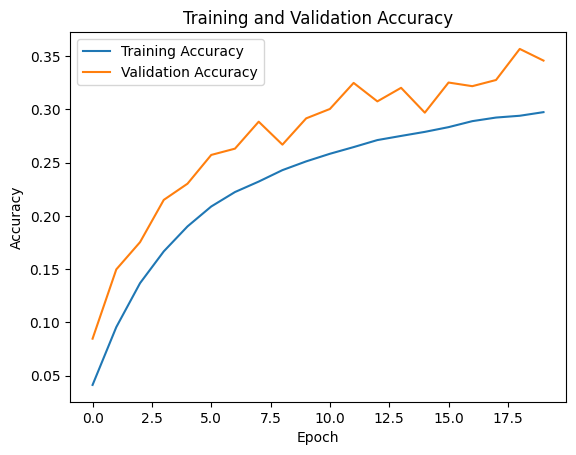

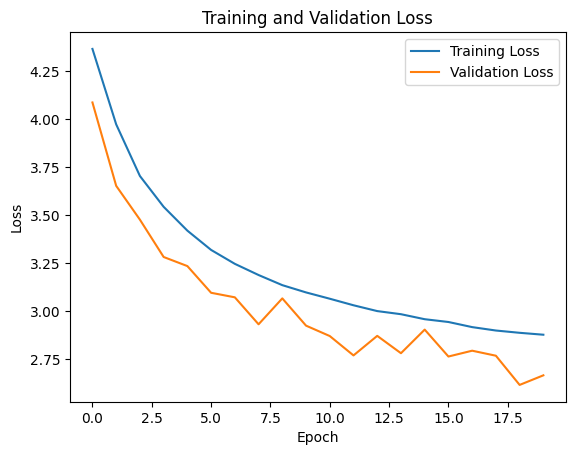

Found 20200 images belonging to 101 classes.
632/632 [==============================] - 249s 392ms/step
Confusion Matrix:
[[31  4  6 ...  7  0  0]
 [ 0 82  1 ...  2  0  1]
 [10  1 47 ...  5  1  0]
 ...
 [ 0  1  0 ... 97  0  0]
 [ 0  2  1 ...  1 51  0]
 [ 2  2  1 ...  6  0 21]]
Classification Report:
                         precision    recall  f1-score   support

              apple_pie       0.18      0.15      0.17       200
         baby_back_ribs       0.20      0.41      0.27       200
                baklava       0.41      0.23      0.30       200
         beef_carpaccio       0.46      0.58      0.51       200
           beef_tartare       0.46      0.20      0.28       200
             beet_salad       0.33      0.33      0.33       200
               beignets       0.60      0.63      0.61       200
               bibimbap       0.37      0.55      0.44       200
          bread_pudding       0.19      0.28      0.22       200
      breakfast_burrito       0.16      0.03    

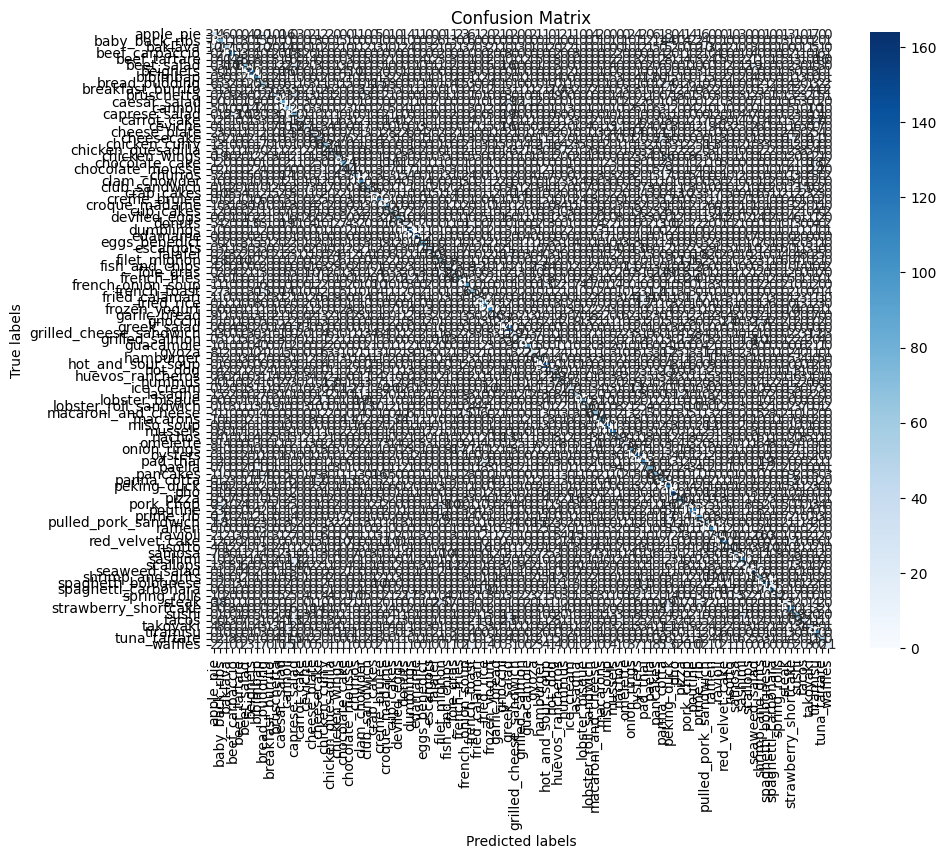

1/1 [==============================] - 0s 294ms/step
Predicted Class: bibimbap
Calorie Content: 600 calories


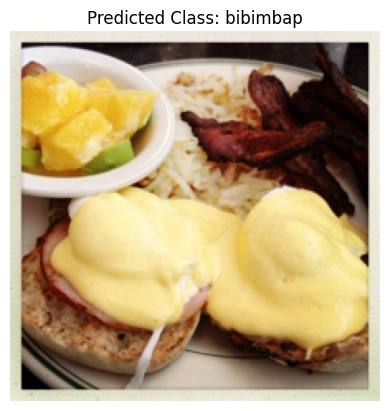

1/1 [==============================] - 0s 43ms/step
Predicted Class: greek_salad
Calorie Content: 200 calories


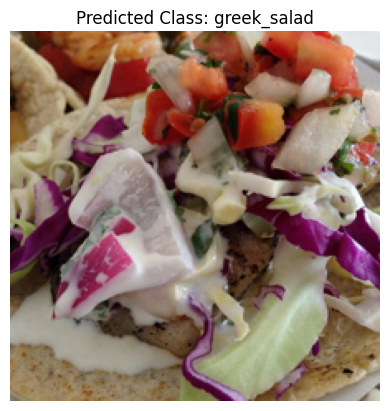

1/1 [==============================] - 0s 37ms/step
Predicted Class: peking_duck
Calorie Content: 600 calories


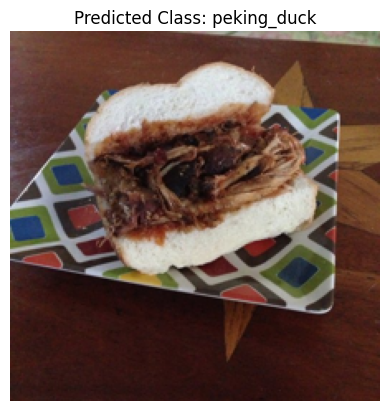

1/1 [==============================] - 0s 39ms/step
Predicted Class: beef_tartare
Calorie Content: 200 calories


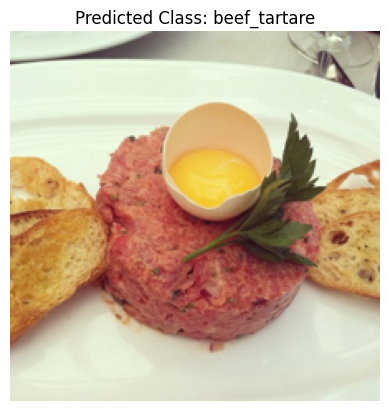

1/1 [==============================] - 0s 40ms/step
Predicted Class: ravioli
Calorie Content: 400 calories


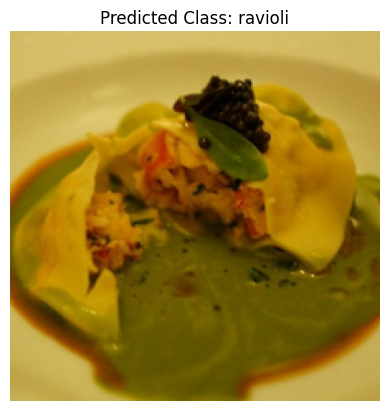

In [2]:
import os
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

# Path to the train and test directories
train_dir = "C:\\Users\\Lingesh\\OneDrive\\Desktop\\ML Intern\\Task - 5 images\\train"
test_dir = "C:\\Users\\Lingesh\\OneDrive\\Desktop\\ML Intern\\Task - 5 images\\test"


# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation and preprocessing for training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data preprocessing for validation set
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load and augment training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation images
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

print("Training completed!")

# Save the model
model.save("food_classification_model.h5")
print("Model saved!")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Generate predictions for test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Confusion matrix and classification report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Define the calorie content dictionary
calorie_mapping = {
    "apple_pie": 300,
    "baby_back_ribs": 700,
    "baklava": 400,
    "beef_carpaccio": 250,
    "beef_tartare": 200,
    "beet_salad": 100,
    "beignets": 350,
    "bibimbap": 600,
    "bread_pudding": 400,
    "breakfast_burrito": 700,
    "bruschetta": 150,
    "caesar_salad": 250,
    "cannoli": 200,
    "caprese_salad": 200,
    "carrot_cake": 350,
    "ceviche": 200,
    "cheesecake": 400,
    "cheese_plate": 300,
    "chicken_curry": 400,
    "chicken_quesadilla": 450,
    "chicken_wings": 300,
    "chocolate_cake": 350,
    "chocolate_mousse": 300,
    "churros": 300,
    "clam_chowder": 250,
    "club_sandwich": 600,
    "crab_cakes": 300,
    "creme_brulee": 400,
    "croque_madame": 550,
    "cup_cakes": 250,
    "deviled_eggs": 100,
    "donuts": 300,
    "dumplings": 400,
    "edamame": 150,
    "eggs_benedict": 600,
    "escargots": 200,
    "falafel": 350,
    "filet_mignon": 700,
    "fish_and_chips": 800,
    "foie_gras": 1200,
    "french_fries": 300,
    "french_onion_soup": 300,
    "french_toast": 350,
    "fried_calamari": 350,
    "fried_rice": 400,
    "frozen_yogurt": 150,
    "garlic_bread": 200,
    "gnocchi": 250,
    "greek_salad": 200,
    "grilled_cheese_sandwich": 350,
    "grilled_salmon": 350,
    "guacamole": 200,
    "gyoza": 200,
    "hamburger": 600,
    "hot_and_sour_soup": 150,
    "hot_dog": 300,
    "huevos_rancheros": 500,
    "hummus": 150,
    "ice_cream": 250,
    "lasagna": 500,
    "lobster_bisque": 350,
    "lobster_roll_sandwich": 450,
    "macaroni_and_cheese": 400,
    "macarons": 100,
    "miso_soup": 100,
    "mussels": 400,
    "nachos": 600,
    "omelette": 300,
    "onion_rings": 300,
    "oysters": 100,
    "pad_thai": 700,
    "paella": 600,
    "pancakes": 300,
    "panna_cotta": 300,
    "peking_duck": 600,
    "pho": 500,
    "pizza": 300,
    "pork_chop": 500,
    "poutine": 800,
    "prime_rib": 800,
    "pulled_pork_sandwich": 600,
    "ramen": 600,
    "ravioli": 400,
    "red_velvet_cake": 350,
    "risotto": 400,
    "samosa": 200,
    "sashimi": 100,
    "scallops": 300,
    "seaweed_salad": 100,
    "shrimp_and_grits": 600,
    "spaghetti_bolognese": 500,
    "spaghetti_carbonara": 600,
    "spring_rolls": 200,
    "steak": 700,
    "strawberry_shortcake": 350,
    "sushi": 400,
    "tacos": 300,
    "takoyaki": 200,
    "tiramisu": 300,
    "tuna_tartare": 200,
    "waffles": 300,
}


# Randomly select some images from the test set and predict their classes
random_indices = np.random.choice(len(test_generator.filenames), size=5, replace=False)
for index in random_indices:
    image_path = os.path.join(test_dir, test_generator.filenames[index])
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_class = target_names[np.argmax(prediction)]
    
    # Print predicted class and calorie content
    print(f'Predicted Class: {predicted_class}')
    calorie_content = calorie_mapping.get(predicted_class, None)
    if calorie_content is not None:
        print(f'Calorie Content: {calorie_content} calories')
    else:
        print('Calorie content information not available')
    
    plt.imshow(image.squeeze())
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()
